###Задача 1
Постройте график <br>
Назовите график  <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы <br>

1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv


In [1]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###1.2 Изучите стоимости недвижимости

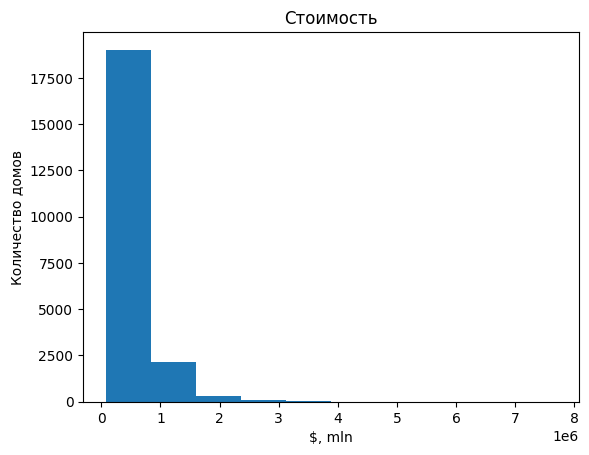

In [2]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.title('Стоимость')
plt.xlabel('$, mln')
plt.ylabel('Количество домов');

Большая чать недвижимости имеет стоимость менее 1 млн.

###1.3 Изучите распределение квадратуры жилой

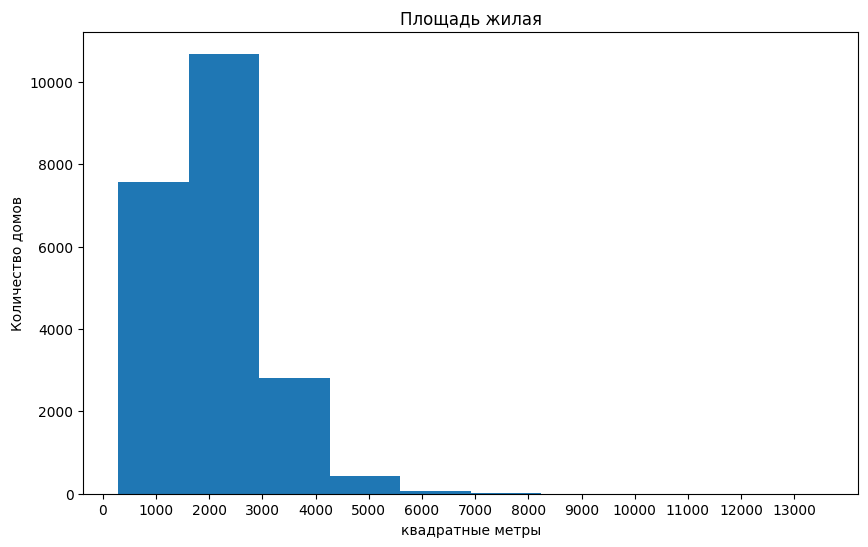

In [3]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(df['sqft_living'])
plt.title('Площадь жилая')
plt.xlabel('квадратные метры')
plt.ylabel('Количество домов')
plt.xticks(np.arange(0,14000,1000));

Большая чать недвижимости имеет жилую площадь от 2 до 3 тыс. кв.метров.

###1.4 Изучите распределение года постройки

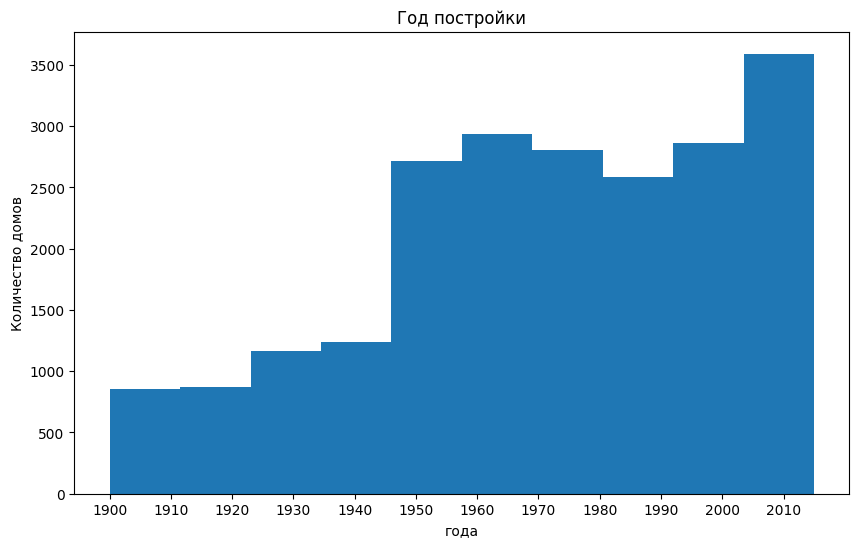

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['yr_built'])
plt.title('Год постройки')
plt.xlabel('года')
plt.ylabel('Количество домов')
plt.xticks(np.arange(1900,2020,10));

Кол-во домов, построенных после 1945г., раза в 3 превышает кол-во домов, построенных с 1900 до 1945.
Больше всего домов построили после 2005г.  

##Задача2:
###2.1 Изучите распределение домов от наличия вида на набережную
Постройте график. Сделайте выводы.

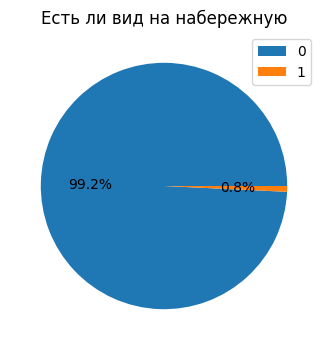

In [65]:
df21 = df.pivot_table(index='waterfront',
              #columns = 'price',
               values = 'id',
               aggfunc= 'count').reset_index()
     
plt.figure(figsize=(6, 4))
plt.pie(df21['id'], autopct='%1.1f%%')
plt.title('Есть ли вид на набережную')
plt.legend(df21['waterfront']);

Домов с видом на набережную очень мало, они составляют долю всего 0,8%

###2.2 Изучите распределение этажей домов

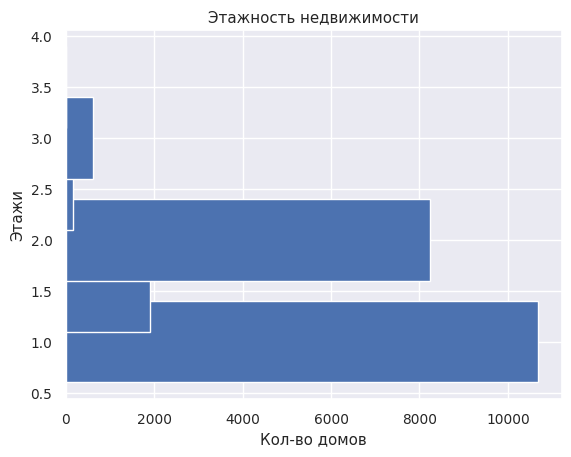

In [147]:
df22 = df.pivot_table(index='floors',
              #columns = 'price',
               values = 'id',
               aggfunc= 'count').reset_index()

plt.barh(df22['floors'],df22['id'])
plt.title('Этажность недвижимости')
plt.xlabel('Кол-во домов')
plt.ylabel('Этажи');

Больше всего одноэтажных домов, меньше всего 3-х этажных. Бывают дома 1,5 и 2,5 этажа.

###2.3 Изучите распределение состояния домов

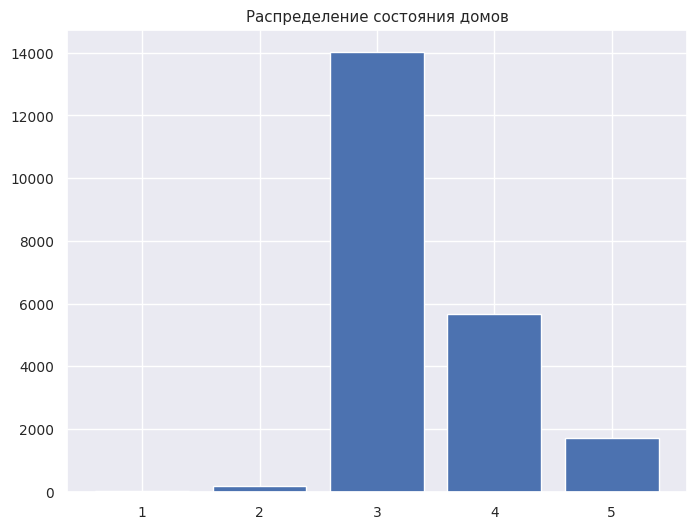

In [149]:
data = df['condition'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(8, 6))
plt.bar(names, values)
plt.title('Распределение состояния домов');

Больше всего домов на "троечку".

##Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

<ipython-input-99-b2d0d05eae29>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


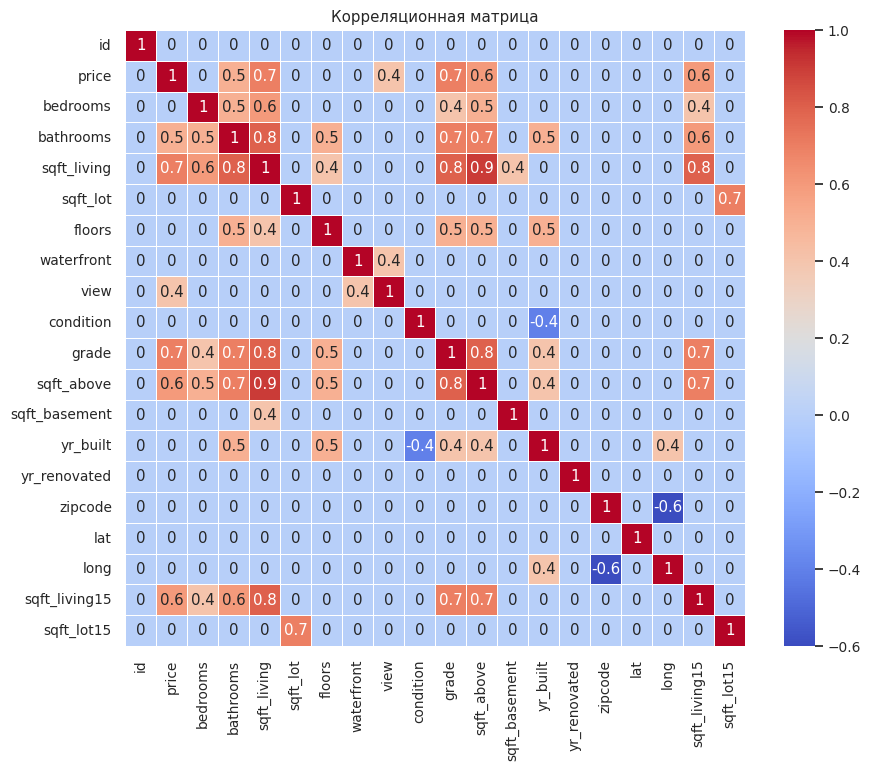

In [99]:
import seaborn as sns

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0
corr_matrix

plt.figure(figsize=(10, 8))
sns.set(font_scale=0.9)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Корреляционная матрица');

Наилучшим образом зависимость между парметрами показывает корреляционная матрица. Мы видим, что на стоимость (price) оказывают значительное влияние следующие параметры: жилая площадь (sqft_living), конструкция дома (grade), площадь выше земли (sqft_above), кв. площадь у 15 соседей (sqft_living15) и кол-во ванных комнат (bathrooms). <br>
Рассмотрим эти параметры подробнее.


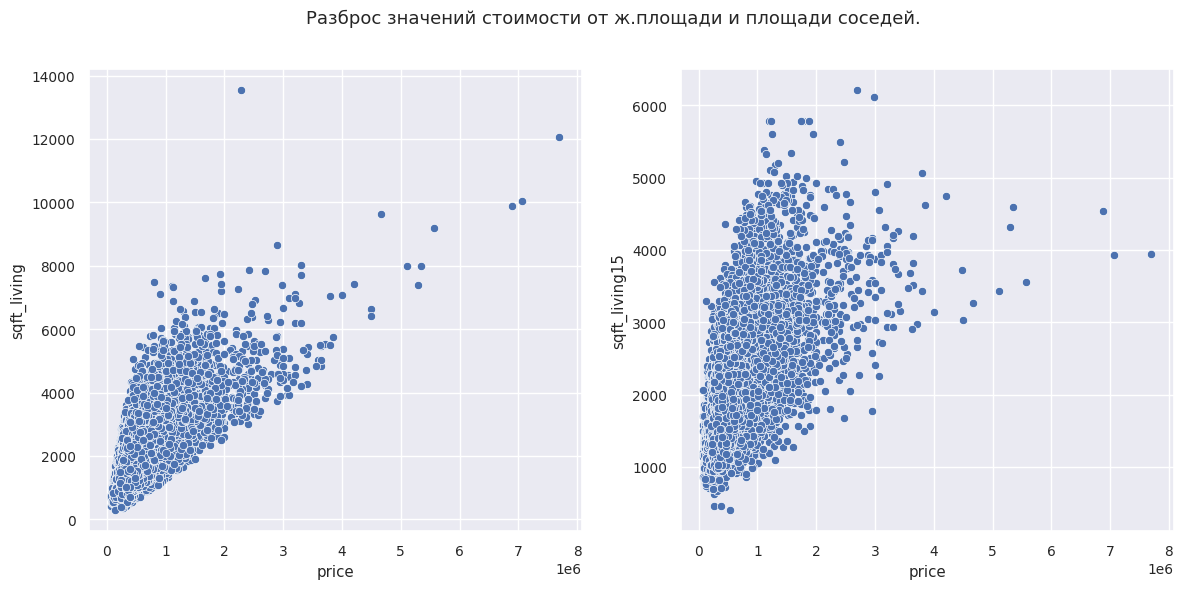

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Разброс значений стоимости от ж.площади и площади соседей.')
sns.scatterplot(data=df, x='price', y='sqft_living', ax=axes[0])
sns.scatterplot(data=df, x='price', y='sqft_living15', ax=axes[1]);

Действительно можно наблюдать практически линейную зависимость стоимости от жилой площади и площади соседей. Также графики подтверждают зависимость 0,8 между sqft_living и sqft_living15. 

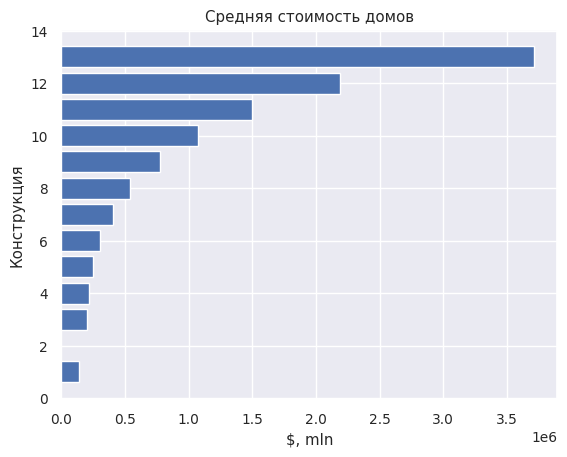

In [136]:
df31 = df.pivot_table(index='grade',
              #columns = 'price',
               values = 'price',
               aggfunc= 'mean').reset_index()

plt.barh(df31['grade'],df31['price'])
plt.title('Средняя стоимость домов')
plt.xlabel('$, mln')
plt.ylabel('Конструкция');

Как видим, чем лучше конструкция дома, тем выше его стоимость.

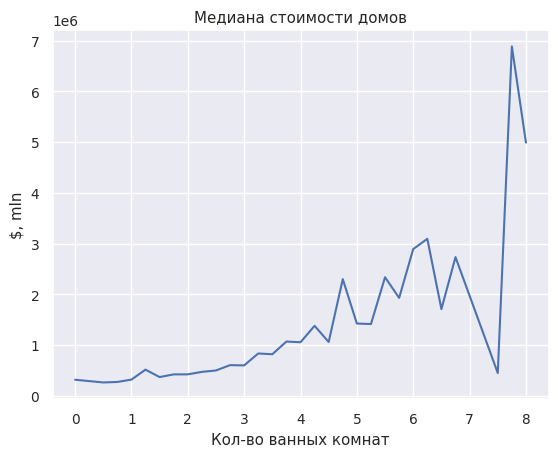

In [146]:
df31 = df.pivot_table(index='bathrooms',
              #columns = 'price',
               values = 'price',
               aggfunc= 'median').reset_index()

sns.lineplot(x=df31['bathrooms'], y=df31['price'])
plt.title('Медиана стоимости домов')
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('$, mln');

Увеличение кол-ва ванных комнат также способствует увеличению стоимости дома, но не столь резко как предыдущие параметры, что соответствует корреляции 0,5.  

Отдельные графики зависимостей подтверждают первые выводы, которые мы сделали из таблицы корреляции. 